<a href="https://colab.research.google.com/github/CommanderWedgeAntilles/CS450/blob/master/Module_03%20esf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Identifying those customers most likely to subscribe to a term deposit


In [1]:
import pandas as pd

campaign = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')
campaign.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [2]:
campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [3]:
campaign.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [4]:
 36548/(36548 + 4640)

0.8873458288821987

It seems like we have an imbalanced dataset — one where we have many more instances of one target value than another.

We have 89% of my samples report "no" for the target. So, let's first address this problem.

In [5]:
from imblearn.over_sampling import RandomOverSampler
# https://imbalanced-learn.readthedocs.io/en/stable/user_guide.html


# Let's over sample the minority class, which samples with replacement until the
# majority (no) and the minority (yes) are equal
ro = RandomOverSampler()

# Decide which features to use
features = ['age', 'job',	'marital', 'education',	'default',	'housing',	'loan',	'contact',	'month',	'day_of_week',	'campaign',	'pdays',	'previous',	'poutcome',	'emp.var.rate',	'cons.price.idx',	'cons.conf.idx',	'euribor3m',	'nr.employed']
X = campaign[features]
y = campaign['y']

# Oversample, note that we oversample X and y at the same time in order to 
# make sure our features and targets stay synched.
X_new, y_new = ro.fit_resample(X, y)

# Convert this to a dataframe and check the counts, now they're equal, because
# we have a bunch of duplicate survivors

balanced_campaign = pd.DataFrame(data=X_new, columns=['age', 'job',	'marital', 'education',	'default',	'housing',	'loan',	'contact',	'month',	'day_of_week',	'campaign',	'pdays',	'previous',	'poutcome',	'emp.var.rate',	'cons.price.idx',	'cons.conf.idx',	'euribor3m',	'nr.employed'])
balanced_campaign['y'] = y_new 
balanced_campaign.head()
#equal_campaign = pd.DataFrame(y_new)
#equal_campaign.value_counts()

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [6]:
balanced_campaign.y.value_counts()

no     36548
yes    36548
Name: y, dtype: int64

*   boosted decision tree ensembles were the best performing model of those tested for datasets containing up to 4,000 descriptive features.
*   model ensembles: bagging and boosting
*   decision tree

# Decision Tree

In [7]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Drop missing values from embarked
balanced_campaign = balanced_campaign.dropna()

# Let's treat quantitative variables as categorical
#equal_campaign['age_cat'] = equal_campaign['age'].astype('category')
#equal_campaign['pdays_cat'] = equal_campaign['pdays'].astype('category')
#equal_campaign['previous_cat'] = equal_campaign['previous'].astype('category')
#equal_campaign['emp.var.rate_cat'] = equal_campaign['emp.var.rate'].astype('category')
#equal_campaign['cons.price.idx_cat'] = equal_campaign['cons.price.idx'].astype('category')
#equal_campaign['cons.conf.idx_cat'] = equal_campaign['cons.conf.idx'].astype('category')
#equal_campaign['euribor3m_cat'] = equal_campaign['euribor3m'].astype('category')
#equal_campaign['nr.employed_cat'] = equal_campaign['nr.employed'].astype('category')

# Encode our features and target as needed
features = ['age', 'job',	'marital', 'education',	'default',	'housing',	'loan',	'contact',	'month',	'day_of_week',	'campaign',	'pdays',	'previous',	'poutcome',	'emp.var.rate',	'cons.price.idx',	'cons.conf.idx',	'euribor3m',	'nr.employed']
X = pd.get_dummies(balanced_campaign[features], drop_first=True)
y = balanced_campaign.y

# Split our data into training and test data, with 30% reserved for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Build the decision tree
clf = DecisionTreeClassifier()

# Train it
clf.fit(X_train, y_train)

# Test it 
clf.score(X_test, y_test)

# Note that this gives us an accuracy score, which may not be the best metric.
# See the SciKit-Learn docs for more ways to assess a model's performance, as
# well as methods for cross validation.

0.9337863103652697

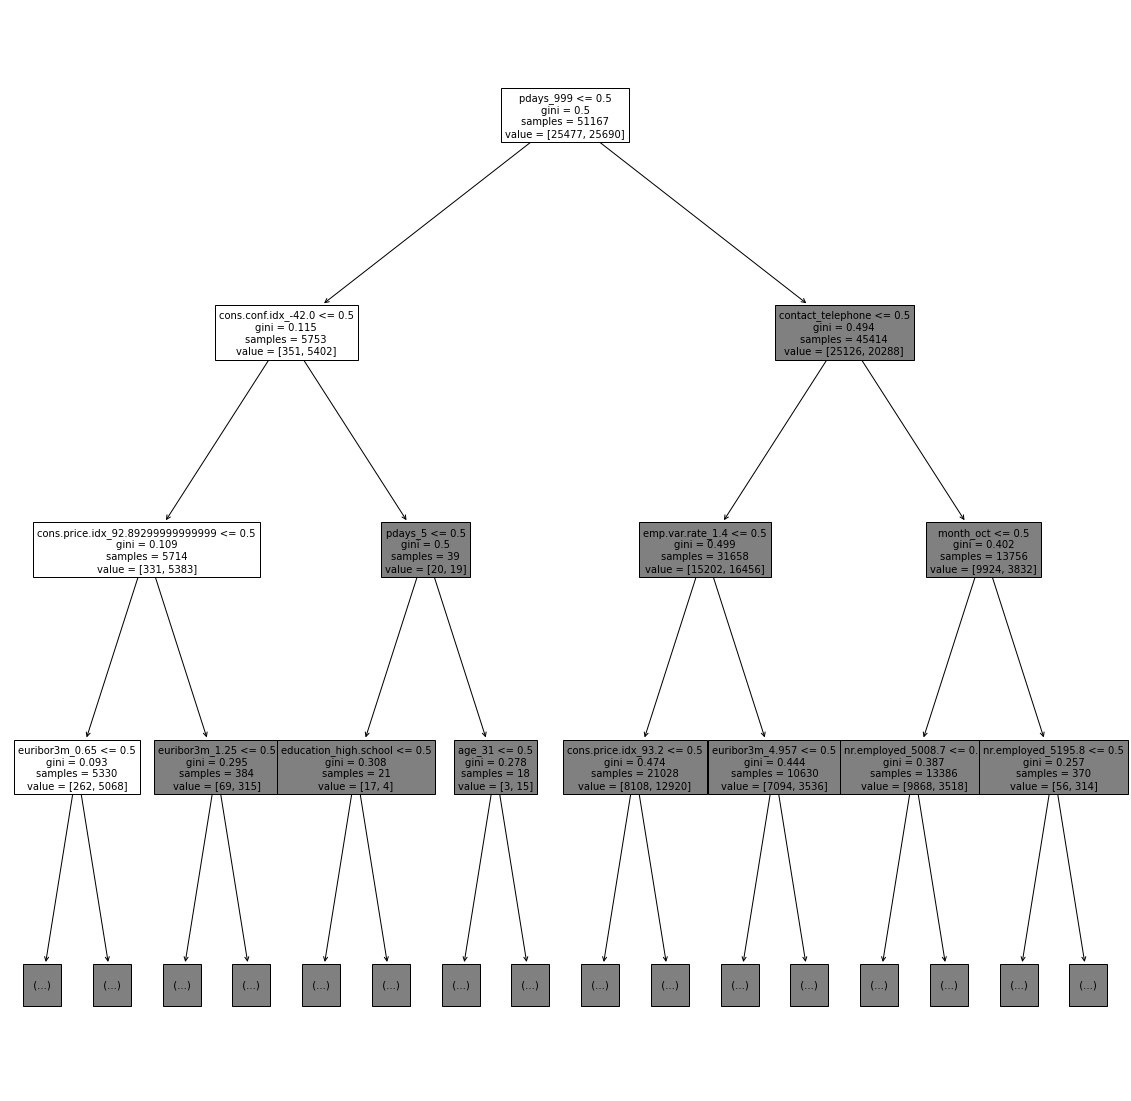

In [8]:
# Let's visualize the tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 20))
tree.plot_tree(clf, fontsize=10, feature_names=X.columns, max_depth=3)
plt.show()
